# Buckingham $\Pi$

The power of dimensional analysis of the equations of motion is typically reserved for fluid mechanics courses, however, in dynamics, we can learn a lot from a great dimensional analysis. Moreover, it provides the best units for numerical intergration which can avoid rounding error from using combinations of numbers with large orders of magnitude far from unity. Also, units in galactic dynamics can be quite unintuitive at first glance and differ from SI units. I have revisted this theme multiple times, and I can say that my understand has not grown to a maximum until I learned about the Buckingham $\Pi$ theorem.

## outline
1. motivation (above)
    1. Add more context in galactic dynamics.
    2. Perhaps talk about a variety of different numerical integrators and tools. Thus, if you ever want to go into the greater community, a strong knowledge of unit and dimensionality is imperitive. 
        1. how bad Nbody6 is. 
        2. How galpy uses "natural units"


can I get a better source than these wikipedia articles? [Dimensional analysis](https://en.wikipedia.org/wiki/Dimensional_analysis). [Buckingham PI](https://en.wikipedia.org/wiki/Buckingham_%CF%80_theorem). 


YES George W. Bluman \& Sukeyuki Kumei's *Symmetries and Differential Equations*

also, here is this great paper! [BuckinghamPy](https://doi.org/10.1016/j.softx.2021.100851), with the corresponding [python package](https://github.com/saadgroup/BuckinghamPy?tab=readme-ov-file)


## All ideas
1. The basis set in dynamics 
    1. unit conversion as a matrix vector product 

2. The dimensionless numbers (still need to understand this for the three body problem)


## buckingham $\Pi$ for grav dynamics

1. pick the basis vectors: length time and mass
$$
\mathcal{l},\mathcal{T},\mathcal{M}=
\left(\begin{bmatrix}
1 \\
0 \\
0
\end{bmatrix},
\begin{bmatrix}
0 \\
1 \\
0
\end{bmatrix},
\begin{bmatrix}
0 \\
0 \\
1
\end{bmatrix}
\right)
$$



2. construct the dimensionality matrix from the variables and constants of the system. In this system, I will choose the separation distance between the primary and the secondary, the orbital period, the mass of the primary, the mass of the secondary, and the gravitational constant:

$$ \delta a, \tau, m_1, m_2, G $$

Now assemble their column vectors in terms of fundamental units:

$$ 
B=
\left(\begin{bmatrix}
1 \\
0 \\
0
\end{bmatrix},
\begin{bmatrix}
0 \\
1 \\
0
\end{bmatrix},
\begin{bmatrix}
0 \\
0 \\
1
\end{bmatrix},
\begin{bmatrix}
0 \\
0 \\
1
\end{bmatrix},
\begin{bmatrix}
3 \\
-2 \\
-1
\end{bmatrix}
\right)
$$

and voilà this is the dimensionality matrix.

Look how we can generate many things, just by knowing what linear combination of the column vectors. For instance, we can generate the potential as the following:

$$
\Phi=
\begin{bmatrix}
1 & 0 & 0 & 0 & 3 \\
0 & 1 & 0 & 0 & -2\\
0 & 0 & 1 & 1 & -1
\end{bmatrix}

\begin{bmatrix}
-1 \\
0\\
1\\
0\\
1
\end{bmatrix}
= \delta a^{-1} m_1^1 G^1 = \delta a^2 T^{-2} m_1^1
$$


It is interesting to note, that if we changed the choice of the basis, the numerical value of the potential would change. For instance, if we chose to use meters instead of using the $\delta a$, then numerical value of $\Phi$ would change dramatically.

This is why dimensional numbers are so interesting, because they are invariant under change of basis and change of units. To find these dimensionless numbers, we can find the null space of the matrix B.

$$
B\vec{x} =0
$$

In [ ]:
from astropy import units as u
from astropy import constants as const


In [13]:
G = const.G
unitL = u.kpc
unitV = u.km / u.s
unitM = u.Msun
unitG = unitV**2 * unitL/ unitM
G.to(unitG)

<Quantity 4.30091727e-06 km2 kpc / (solMass s2)>

In [12]:
unitM = unitL * unitV**2 / G

unitM.to(u.Msun)

<Quantity 232508.54113536 solMass>

In [ ]:
from galpy.potential import MiyamotoNagaiPotential, NFWPotential, plotPotentials
from astropy import units as u
import numpy as np
from galpy.potential import vcirc
import matplotlib.pyplot as plt

# Define natural units
R0 = 8.0  # kpc
V0 = 220

# Miyamoto-Nagai disk
disk = MiyamotoNagaiPotential(
    a=6.5/R0,      # a / R_0
    b=0.25/R0,      # b / R_0
    ro=R0,
    vo=V0,
    normalize=.8  # Do not normalize to 1
)

# NFW halo
halo = NFWPotential(
    a=20/R0,         # scale radius / R_0
    ro=R0,
    vo=V0,
    normalize=.2  # Do not normalize to 1
)

# Combine potentials
pot = [disk, halo]


R = np.linspace(0.1, 20, 500)  # 0.1 to 20 R0

# Compute circular velocity at each radius
vc = [p.vcirc(R) for p in pot]           # For each component
vc_total = sum(vc)                       # Total rotation curve

vc_total2 = vcirc(pot, R)

index = np.argmin(np.abs(R - 1.0))  # Find index of R=1 (in units of ro)

vc_total2[index] 


np.float64(220.58245304590878)

In [105]:
disk = MiyamotoNagaiPotential(a=.4, b=0.1, normalize=0.6)
halo = NFWPotential(a=1, normalize=0.4)
pot = [disk, halo]

R = np.linspace(0.1, 20, 500)  # 0.1 to 20 R0

# Compute circular velocity at each radius
vc = [p.vcirc(R) for p in pot]           # For each component
vc_total = sum(vc)                       # Total rotation curve

vc_total2 = vcirc(pot, R)

index = np.argmin(np.abs(R - 1.0))  # Find index of R=1 (in units of ro)

vc_total2[index] 


np.float64(0.9989117064759713)

In [107]:
G = 4.30091e-6  # kpc (km/s)^2 / Msun
R = 8.0         # kpc
V0 = 220.0      # km/s

# Disk
v_disk2 = 0.6 * V0**2
M_disk = v_disk2 * R / G

# Hernquist
v_hern2 = 0.4 * V0**2
M_hern = v_hern2 * R / G

print(f"Disk mass within 8 kpc: {M_disk:.2e} Msun")
print(f"Hernquist mass within 8 kpc: {M_hern:.2e} Msun")

Disk mass within 8 kpc: 5.40e+10 Msun
Hernquist mass within 8 kpc: 3.60e+10 Msun


Text(0, 0.5, 'Circular Velocity (V/V0)')

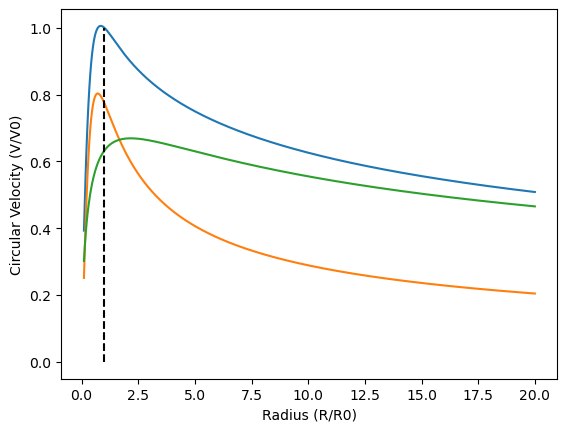

In [106]:
plt.plot(R, vc_total2 , label='Total Rotation Curve')
plt.plot(R, vc[0], label='Disk Rotation Curve')
plt.plot(R, vc[1], label='Halo Rotation Curve')
plt.vlines(1.0, 0, 1, color='k', linestyle='--', label='R=1.0')
plt.xlabel('Radius (R/R0)')
plt.ylabel('Circular Velocity (V/V0)')